In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.drop(['car_ID','CarName'],axis = 1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
df = pd.get_dummies(df,columns=['fueltype'],prefix ='fuel')
df = pd.get_dummies(df,columns=['aspiration'],prefix ='asp')
df = pd.get_dummies(df,columns=['doornumber'],prefix ='door')
df = pd.get_dummies(df,columns=['carbody'],prefix ='body')
df = pd.get_dummies(df,columns=['drivewheel'],prefix ='drive')
df = pd.get_dummies(df,columns=['enginelocation'],prefix ='engineloc')
df = pd.get_dummies(df,columns=['cylindernumber'],prefix ='cylnum')
df = pd.get_dummies(df,columns=['enginetype'],prefix ='engtype')
df = pd.get_dummies(df,columns=['fuelsystem'],prefix ='feulsys')
df= df*1
y = df['price']
x = df.copy()
x.drop(['price'],axis=1,inplace=True)
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,engtype_ohcv,engtype_rotor,feulsys_1bbl,feulsys_2bbl,feulsys_4bbl,feulsys_idi,feulsys_mfi,feulsys_mpfi,feulsys_spdi,feulsys_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


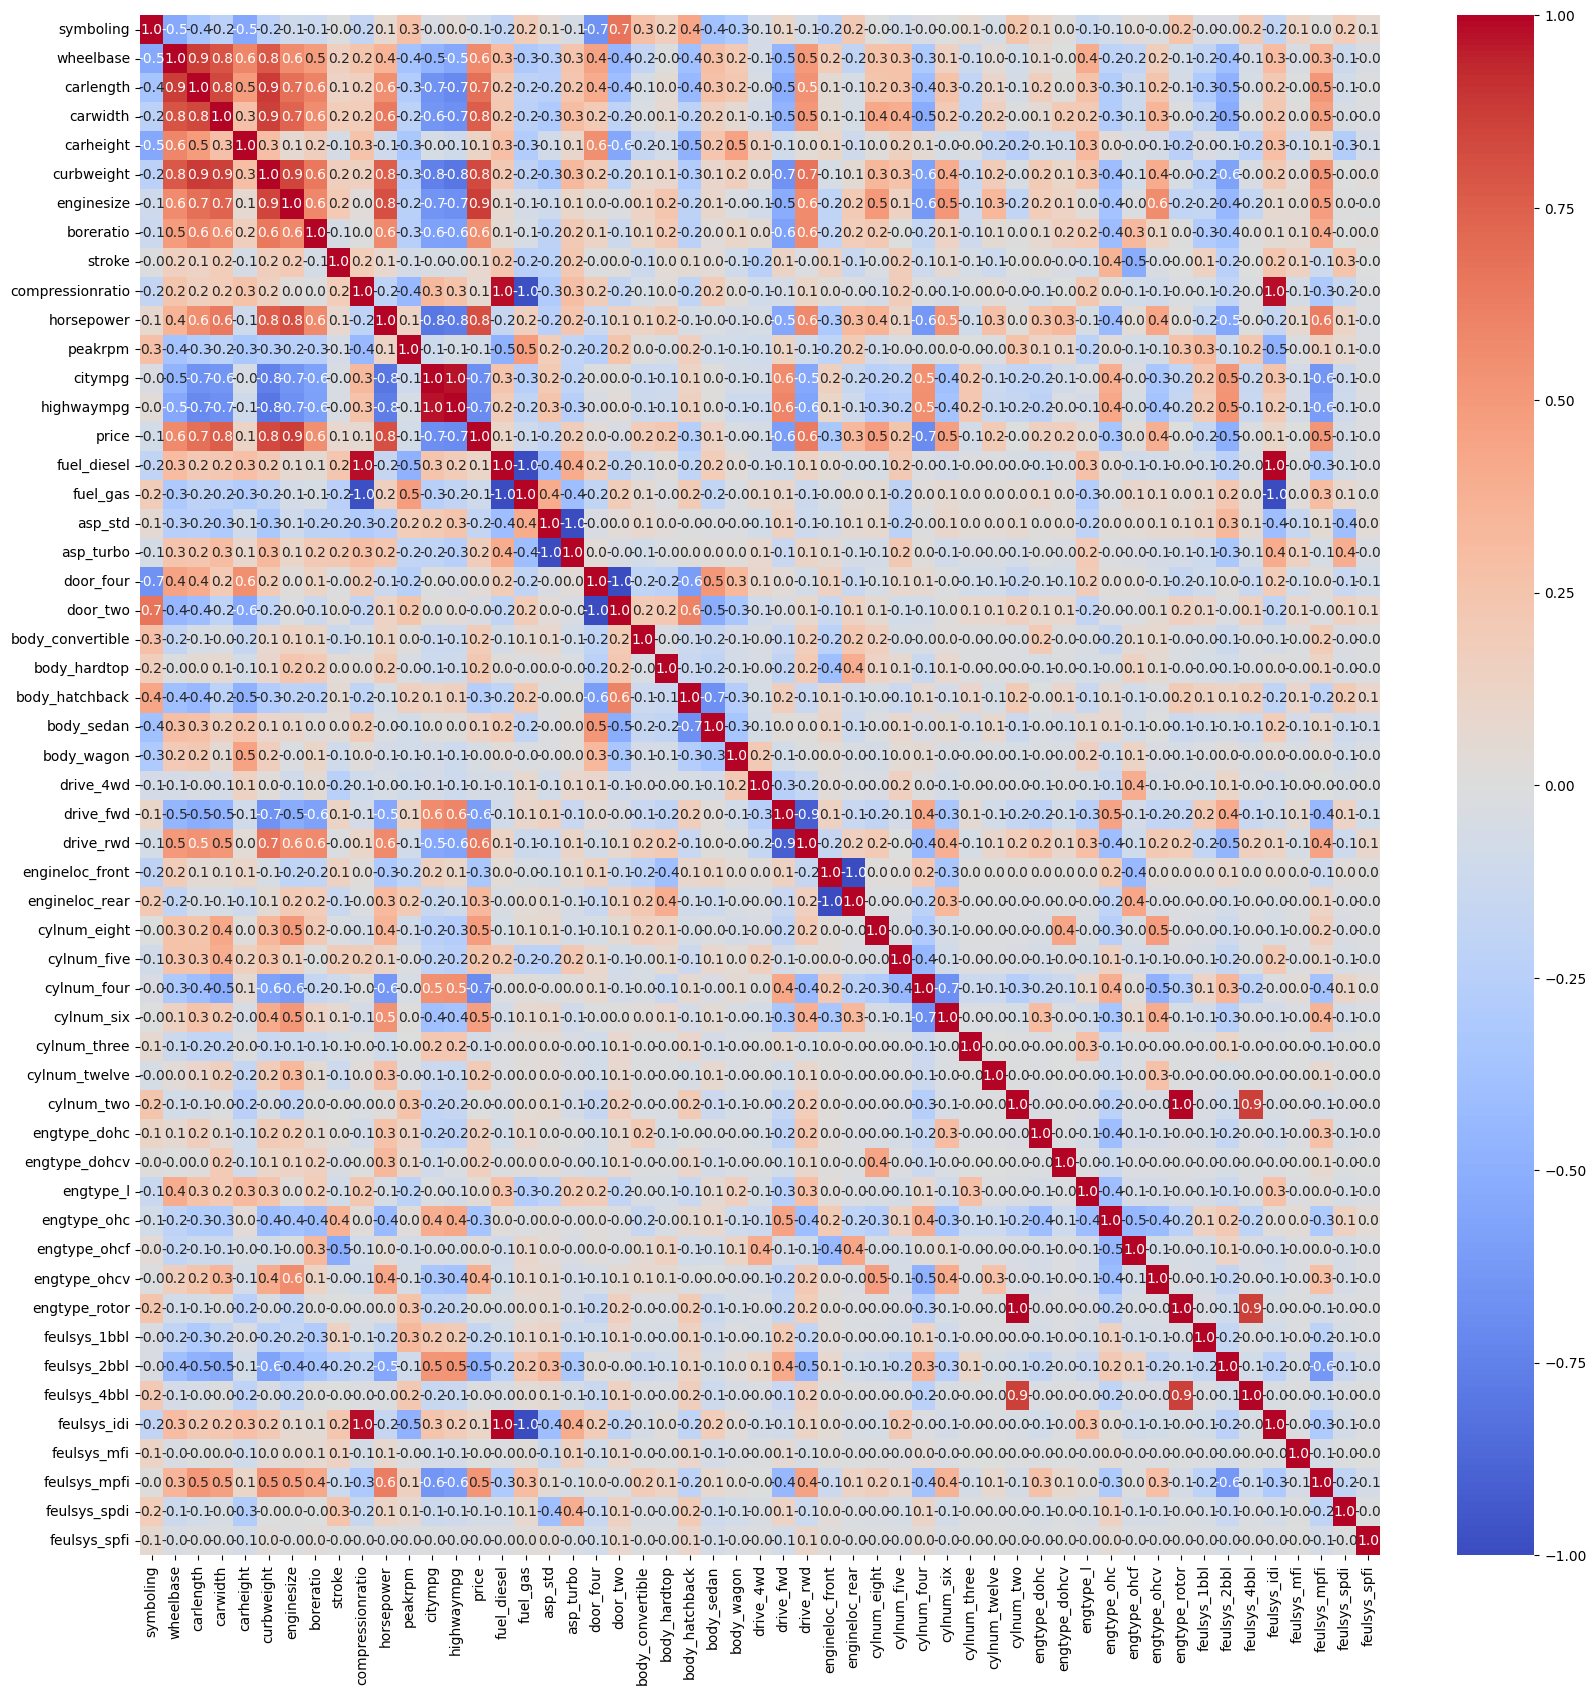

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

In [33]:
target_corr = corr_matrix['price']
sorted_corr = target_corr.sort_values(ascending = True) 
print(sorted_corr) 

cylnum_four        -0.697762
highwaympg         -0.697599
citympg            -0.685751
drive_fwd          -0.601950
feulsys_2bbl       -0.501374
engtype_ohc        -0.344270
engineloc_front    -0.324973
body_hatchback     -0.262039
asp_std            -0.177926
feulsys_1bbl       -0.170945
fuel_gas           -0.105679
peakrpm            -0.085267
symboling          -0.079978
cylnum_three       -0.071388
feulsys_spdi       -0.061475
drive_4wd          -0.058866
body_wagon         -0.042310
door_two           -0.031835
feulsys_spfi       -0.019580
feulsys_4bbl       -0.017306
cylnum_two         -0.004544
engtype_rotor      -0.004544
feulsys_mfi        -0.002747
engtype_ohcf        0.016285
door_four           0.031835
engtype_l           0.042267
compressionratio    0.067984
stroke              0.079443
feulsys_idi         0.105679
fuel_diesel         0.105679
carheight           0.119336
body_sedan          0.125716
engtype_dohc        0.151429
engtype_dohcv       0.159225
asp_turbo     

In [27]:
def standardize(df):
    for i in df.columns:
        mean = df[i].mean()
        std = df[i].std()
        df[i] = (df[i]-mean)/std
    return df
no_hot = x.iloc[:,:14]
one_hot = x.iloc[:,14:]
no_hot = standardize(no_hot)
x = pd.concat([no_hot,one_hot],axis=1)
y = (y-y.mean())/y.std()


In [28]:
train_size = int(0.8*len(x))


In [29]:
def init_w(arr):
    w= np.zeros(len(arr[0]))
    b = 0
    return w,b
x_num=x.to_numpy()
x_train = x_num[:train_size,:]
x_test = x_num[train_size:,:]
y=y.to_numpy()
y_train = y[:train_size]
y_test=y[train_size:]




In [30]:
def g_descent(x,y,rate,iter):
    w,b =  init_w(x)
    m,n = x.shape
    for i in range(iter):
        slopes_w = (2/m) * x.T.dot(x.dot(w)+b - y)
        w -=rate*slopes_w
        slopes_b = (2/m) * np.sum(x.dot(w)+b - y)
        b -=rate*slopes_b
        if i%100 == 0:
            cost = (1/m) * np.sum((x.dot(w)+b - y) ** 2)
            print(f"Iteration {i}: Cost = {cost}")
    return w,b

In [47]:
w,b = g_descent(x_train,y_train,0.12,4500)

Iteration 0: Cost = 1.0058360675823776
Iteration 100: Cost = 0.15522586970824861
Iteration 200: Cost = 0.05969902303066436
Iteration 300: Cost = 0.04493749421921825
Iteration 400: Cost = 0.041677004976056774
Iteration 500: Cost = 0.04039450729536242
Iteration 600: Cost = 0.03962340558209848
Iteration 700: Cost = 0.03906659385583437
Iteration 800: Cost = 0.0386309911885707
Iteration 900: Cost = 0.038274342482133766
Iteration 1000: Cost = 0.03797323690530888
Iteration 1100: Cost = 0.03771328798560018
Iteration 1200: Cost = 0.03748503650903387
Iteration 1300: Cost = 0.03728193362789619
Iteration 1400: Cost = 0.037099254751144214
Iteration 1500: Cost = 0.036933476785459746
Iteration 1600: Cost = 0.036781901767987464
Iteration 1700: Cost = 0.03664241861434726
Iteration 1800: Cost = 0.036513346034990055
Iteration 1900: Cost = 0.036393325249219406
Iteration 2000: Cost = 0.036281244450830114
Iteration 2100: Cost = 0.03617618421960101
Iteration 2200: Cost = 0.03607737716936709
Iteration 2300: C